In [1]:
from PIL import Image

%matplotlib inline

In [2]:
import colorgram

In [3]:
image = Image.open("images/1.jpg")

In [20]:
colors = colorgram.extract("images/face.jpeg", 6)

In [21]:
colors
# colorgram.extract returns Color objects, which let you access
# RGB, HSL, and what proportion of the image was that color.
first_color = colors[0]
rgb = first_color.rgb # e.g. (255, 151, 210)
hsl = first_color.hsl # e.g. (230, 255, 203)
proportion  = first_color.proportion # e.g. 0.34

# RGB and HSL are named tuples, so values can be accessed as properties.
# These all work just as well:
red = rgb[0]
red = rgb.r
saturation = hsl[1]
saturation = hsl.s

In [22]:
colors_features = []
for color in colors:
    colors_features.extend([color.rgb.r, color.rgb.g, color.rgb.b])

In [23]:
print (colors_features)

[223, 221, 215, 194, 156, 135, 51, 37, 29, 121, 88, 71, 34, 33, 39, 220, 224, 220]


In [55]:
import cv2
import numpy as np

In [56]:
src = cv2.imread("images/1.jpg")
target_size = (64,64)

dst = cv2.resize(src, target_size)

In [57]:
dst.shape

(64, 64, 3)

In [58]:
dst = dst.reshape(dst.shape[0] * dst.shape[1] * dst.shape[2])

In [59]:
len(dst)

12288

In [11]:
from scipy import ndimage as ndi
from skimage import feature

In [12]:
im = ndi.imread("images/face.jpeg")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


In [13]:
from skimage import data, io
from matplotlib import pyplot as plt

/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


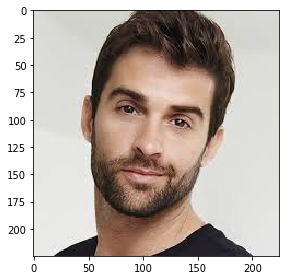

In [14]:
io.imshow(im)

In [18]:
from skimage import measure
from skimage import color
gimg = color.colorconv.rgb2grey(im)
contours = measure.find_contours(gimg, 0.8)
print (len(contours))

65


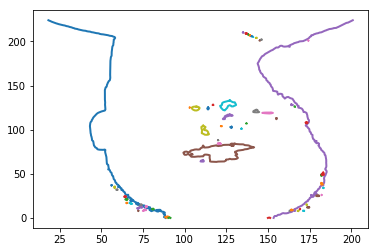

In [17]:
import matplotlib.pyplot as plt
for n, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)

In [71]:
len(contours)

322

In [68]:
from skimage.draw import ellipse
from skimage.measure import find_contours, approximate_polygon, subdivide_polygon

contour = contours[0]
new_s = contour.copy()
appr_s = approximate_polygon(new_s, tolerance=0.8)

In [73]:
import keras

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
# import the necessary packages
from keras.preprocessing import image as image_utils
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras.applications import VGG16
import numpy as np
import argparse
import cv2
 
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
# help="path to the input image")
# args = vars(ap.parse_args())
 
# # load the original image via OpenCV so we can draw on it and display
# # it to our screen later
orig = cv2.imread('images/cat.jpg')

In [9]:
# load the input image using the Keras helper utility while ensuring
# that the image is resized to 224x224 pxiels, the required input
# dimensions for the network -- then convert the PIL image to a
# NumPy array
print("[INFO] loading and preprocessing image...")
image = image_utils.load_img('images/cat.jpg', target_size=(224, 224))
image = image_utils.img_to_array(image)

[INFO] loading and preprocessing image...


In [10]:
# our image is now represented by a NumPy array of shape (224, 224, 3),
# assuming TensorFlow "channels last" ordering of course, but we need
# to expand the dimensions to be (1, 3, 224, 224) so we can pass it
# through the network -- we'll also preprocess the image by subtracting
# the mean RGB pixel intensity from the ImageNet dataset
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

In [ ]:
# load the VGG16 network pre-trained on the ImageNet dataset
print("[INFO] loading network...")
model = VGG16(weights="imagenet")
 
# classify the image
print("[INFO] classifying image...")
preds = model.predict(image)
P = decode_predictions(preds)
 
# loop over the predictions and display the rank-5 predictions +
# probabilities to our terminal
for (i, (imagenetID, label, prob)) in enumerate(P[0]):
	print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))
 
# load the image via OpenCV, draw the top prediction on the image,
# and display the image to our screen
orig = cv2.imread('images/1.jpg')
(imagenetID, label, prob) = P[0][0]
cv2.putText(orig, "Label: {}, {:.2f}%".format(label, prob * 100),
	(10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
cv2.imshow("Classification", orig)

In [9]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = 'images/face.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Predicted: [('n03595614', 'jersey', 0.49321762), ('n04350905', 'suit', 0.09316927), ('n02804610', 'bassoon', 0.044864587)]


Total number of Faces found 1


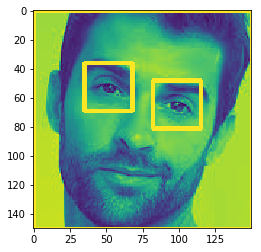

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob
txtfiles = [] 
for file in glob.glob("images/face.jpeg"):
    txtfiles.append(file)
    
for ix in txtfiles:
    img = cv2.imread(ix,cv2.IMREAD_COLOR)
    imgtest1 = img.copy()
    imgtest = cv2.cvtColor(imgtest1, cv2.COLOR_BGR2GRAY)
    facecascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
   
    faces = facecascade.detectMultiScale(imgtest, scaleFactor=1.2, minNeighbors=5)
 
    print ("Total number of Faces found",len(faces))
    
    for (x, y, w, h) in faces:
        face_detect = cv2.rectangle(imgtest, (x, y), (x+w, y+h), (255, 0, 255), 2)
        roi_gray = imgtest[y:y+h, x:x+w]
        roi_color = imgtest[y:y+h, x:x+w]        
        plt.imshow(face_detect)
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            eye_detect = cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,255),2)
            plt.imshow(eye_detect)

In [35]:
# face detection
img = cv2.imread("images/face.jpeg", cv2.IMREAD_COLOR)
imgtest1 = img.copy()
imgtest = cv2.cvtColor(imgtest1, cv2.COLOR_BGR2GRAY)
facecascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

faces = facecascade.detectMultiScale(imgtest, scaleFactor=1.2, minNeighbors=5)

In [36]:
len(faces)

1

In [24]:
# import the necessary packages
from imutils import build_montages
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2

In [26]:
def image_colorfulness(image):
    # split the image into its respective RGB components
    (B, G, R) = cv2.split(image.astype("float"))
 
    # compute rg = R - G
    rg = np.absolute(R - G)
 
    # compute yb = 0.5 * (R + G) - B
    yb = np.absolute(0.5 * (R + G) - B)
 
    # compute the mean and standard deviation of both `rg` and `yb`
    (rbMean, rbStd) = (np.mean(rg), np.std(rg))
    (ybMean, ybStd) = (np.mean(yb), np.std(yb))
 
    # combine the mean and standard deviations
    stdRoot = np.sqrt((rbStd ** 2) + (ybStd ** 2))
    meanRoot = np.sqrt((rbMean ** 2) + (ybMean ** 2))
 
    # derive the "colorfulness" metric and return it
    return stdRoot + (0.3 * meanRoot)

In [29]:
image = cv2.imread("images/face.jpeg")
image = imutils.resize(image, width=250)
C = image_colorfulness(image)
 
# display the colorfulness score on the image
print (C)

29.767883445191117


In [37]:
def text_detect(img, ele_size=(8, 2)):  #
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_sobel = cv2.Sobel(img, cv2.CV_8U, 1, 0)  # same as default,None,3,1,0,cv2.BORDER_DEFAULT)
    img_threshold = cv2.threshold(img_sobel, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)
    element = cv2.getStructuringElement(cv2.MORPH_RECT, ele_size)
    img_threshold = cv2.morphologyEx(img_threshold[1], cv2.MORPH_CLOSE, element)
    contours = cv2.findContours(img_threshold, 0, 1)
    Rect = [cv2.boundingRect(i) for i in contours[1] if i.shape[0] > 100]
    RectP = [(int(i[0] - i[2] * 0.08), int(i[1] - i[3] * 0.08), int(i[0] + i[2] * 1.1), int(i[1] + i[3] * 1.1)) for i in
             Rect]
    return RectP

In [42]:
img = cv2.imread("images/1.jpg", cv2.IMREAD_COLOR)
rect = text_detect(img)

In [53]:
def captch_ex(file_name):
    img = cv2.imread(file_name)

    img_final = cv2.imread(file_name)
#     img2gray = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    img2gray = cv2.imread(file_name, 0)
    ret, mask = cv2.threshold(img2gray, 180, 255, cv2.THRESH_BINARY)
    image_final = cv2.bitwise_and(img2gray, img2gray, mask=mask)
    ret, new_img = cv2.threshold(image_final, 180, 255, cv2.THRESH_BINARY)  # for black text , cv.THRESH_BINARY_INV

    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,
                                                         3))  # to manipulate the orientation of dilution , large x means horizonatally dilating  more, large y means vertically dilating more
    dilated = cv2.dilate(new_img, kernel, iterations=9)  # dilate , more the iteration more the dilation

    # for cv2.x.x

    _, contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)  # findContours returns 3 variables for getting contours

    # for cv3.x.x comment above line and uncomment line below

    #image, contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)


    for contour in contours:
        # get rectangle bounding contour
        [x, y, w, h] = cv2.boundingRect(contour)

        # Don't plot small false positives that aren't text
        if w < 35 and h < 35:
            continue

        # draw rectangle around contour on original image
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 255), 2)

        '''
        #you can crop image and send to OCR  , false detected will return no text :)
        cropped = img_final[y :y +  h , x : x + w]

        s = file_name + '/crop_' + str(index) + '.jpg' 
        cv2.imwrite(s , cropped)
        index = index + 1

        '''
    # write original image with added contours to disk
    cv2.imshow('captcha_result', img)
    cv2.waitKey()


file_name = 'images/img_text.jpg'
captch_ex(file_name)

KeyboardInterrupt: 

In [16]:
# USAGE
# opencv-text-detection --image images/lebron_james.jpg

# import the necessary packages
import argparse
import os
import time

import cv2
from nms import nms
import numpy as np

from opencv_text_detection import utils
from opencv_text_detection.decode import decode
from opencv_text_detection.draw import drawPolygons, drawBoxes



def text_detect(image, east, min_confidence, width, height):
    # load the input image and grab the image dimensions
    image = cv2.imread(image)
    orig = image.copy()
    (origHeight, origWidth) = image.shape[:2]

    # set the new width and height and then determine the ratio in change
    # for both the width and height
    (newW, newH) = (width, height)
    ratioWidth = origWidth / float(newW)
    ratioHeight = origHeight / float(newH)

    # resize the image and grab the new image dimensions
    image = cv2.resize(image, (newW, newH))
    (imageHeight, imageWidth) = image.shape[:2]

    # define the two output layer names for the EAST detector model that
    # we are interested -- the first is the output probabilities and the
    # second can be used to derive the bounding box coordinates of text
    layerNames = [
        "feature_fusion/Conv_7/Sigmoid",
        "feature_fusion/concat_3"]

    # load the pre-trained EAST text detector
#     print("[INFO] loading EAST text detector...")
    net = cv2.dnn.readNet(east)

    # construct a blob from the image and then perform a forward pass of
    # the model to obtain the two output layer sets
    blob = cv2.dnn.blobFromImage(image, 1.0, (imageWidth, imageHeight), (123.68, 116.78, 103.94), swapRB=True, crop=False)

    start = time.time()
    net.setInput(blob)
    (scores, geometry) = net.forward(layerNames)
    end = time.time()

    # NMS on the the unrotated rects
    confidenceThreshold = min_confidence
    nmsThreshold = 0.4

    # decode the blob info
    (rects, confidences, baggage) = decode(scores, geometry, confidenceThreshold)

    offsets = []
    thetas = []
    for b in baggage:
        offsets.append(b['offset'])
        thetas.append(b['angle'])

    ##########################################################

    functions = [nms.felzenszwalb.nms, nms.fast.nms, nms.malisiewicz.nms]
    
    drawpolys_count, drawrects_count = 0, 0

    for i, function in enumerate(functions):

        start = time.time()
        indicies = nms.boxes(rects, confidences, nms_function=function, confidence_threshold=confidenceThreshold,
                                 nsm_threshold=nmsThreshold)
        end = time.time()

        indicies = np.array(indicies).reshape(-1)
        
        if len(indicies) != 0:
            drawrects = np.array(rects)[indicies]
            drawpolys_count = len(drawrects)

    # convert rects to polys
    polygons = utils.rects2polys(rects, thetas, offsets, ratioWidth, ratioHeight)


    for i, function in enumerate(functions):

        start = time.time()
        indicies = nms.polygons(polygons, confidences, nms_function=function, confidence_threshold=confidenceThreshold,
                                 nsm_threshold=nmsThreshold)
        end = time.time()

        indicies = np.array(indicies).reshape(-1)
        
        if len(indicies) != 0:
            drawpolys = np.array(polygons)[indicies]
            drawrects_count = len(drawpolys)
    
    return [drawpolys_count, drawrects_count]

#     cv2.waitKey(0)

In [1]:
# USAGE
# opencv-text-detection --image images/lebron_james.jpg

# import the necessary packages
import argparse
import os
import time

import cv2
from nms import nms
import numpy as np

from opencv_text_detection import utils
from opencv_text_detection.decode import decode
from opencv_text_detection.draw import drawPolygons, drawBoxes

In [12]:
from opencv_text_detection.text_detection import text_detection

In [15]:
text_detect('images/img_text.jpg', 'frozen_east_text_detection.pb', 0.5, 320, 320)

[5, 5]